# MCA - Races Canines

In [1]:
# Import dataset
import pandas as pd
A= pd.read_excel("./scientisttools/data/races_canines_acm.xlsx",header=0,index_col=0)

In [2]:
from scientisttools.decomposition import MCA
my_mca = MCA(n_components=None,
             row_labels=A.index[:27],
             var_labels=A.columns[:6],
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=A.index[27:],
             quali_sup_labels=["Fonction"],
             quanti_sup_labels=["Cote"],
             parallelize=False).fit(A)

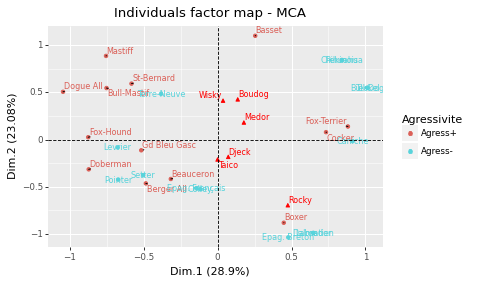

In [3]:
from scientisttools.ggplot import fviz_mca_ind
p = fviz_mca_ind(my_mca,habillage="Agressivite",repel=True)
print(p)

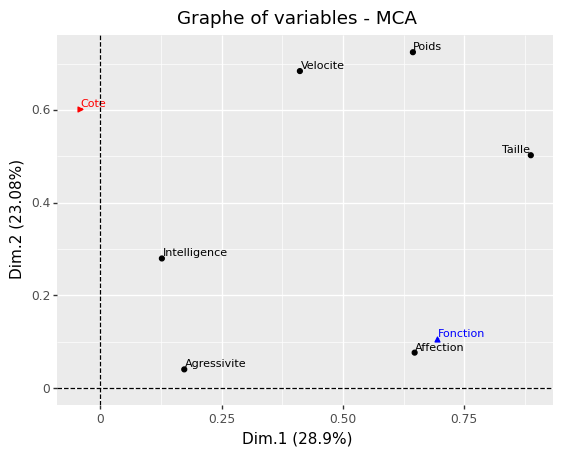

In [20]:
from scientisttools.ggplot import fviz_mca_var
p = fviz_mca_var(my_mca,xlim=None,ylim=None,repel=True,add_quali_sup=True)
print(p)

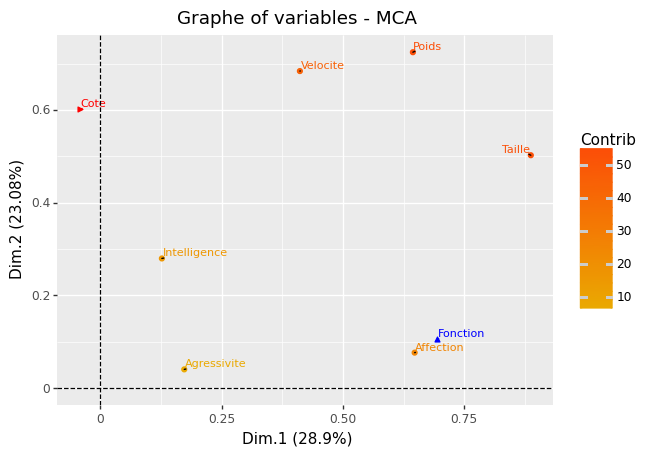

In [16]:
p = fviz_mca_var(my_mca,color="contrib",repel=True,add_quali_sup=True)
print(p)

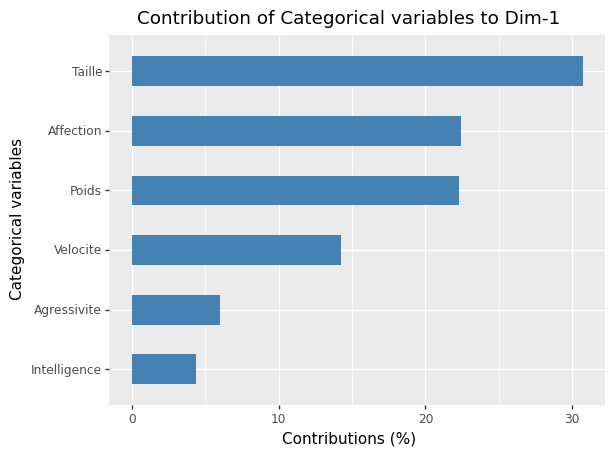

In [6]:
from scientisttools.ggplot import fviz_cosines,fviz_contrib

p = fviz_contrib(my_mca,choice="var")
print(p)

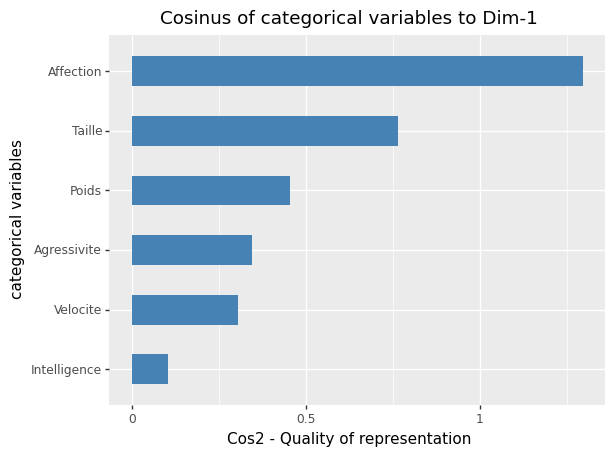

In [7]:
p = fviz_cosines(my_mca,choice="var")
print(p)

In [8]:
from scientisttools.extractfactor import summaryMCA
summaryMCA(my_mca,to_markdown=True)

                     Multiple Correspondance Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |   Dim.6 |   Dim.7 |   Dim.8 |   Dim.9 |   Dim.10 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|
| Variance                |   0.482 |   0.385 |   0.211 |   0.158 |   0.15  |   0.123 |   0.081 |   0.046 |   0.024 |    0.008 |
| Difference              |   0.097 |   0.174 |   0.053 |   0.007 |   0.027 |   0.042 |   0.036 |   0.022 |   0.016 |    0.008 |
| % of var.               |  28.896 |  23.084 |  12.657 |   9.453 |   9.008 |   7.398 |   4.888 |   2.74  |   1.413 |    0.463 |
| Cumulative of % of var. |  28.896 |  51.981 |  64.638 |  74.091 |  83.099 |  90.497 |  95.385 |  98.125 |  99.537 |  100     |

Individuals (the 10 first)

| Chien       |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |   ctr |   cos2 |   Dim.2 |   

In [9]:
from scientisttools.extractfactor import get_mca_ind,get_mca_var,get_mca_mod
row = get_mca_ind(my_mca)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos', 'ind_sup'])

In [10]:
row_sup = row["ind_sup"]
row_sup.keys()

dict_keys(['coord', 'cos2'])

In [11]:
var = get_mca_var(my_mca)
var.keys()

dict_keys(['chi2', 'inertia', 'eta2', 'cos2', 'contrib', 'quanti_sup', 'quali_sup'])

In [12]:
var_quant_sup = var["quanti_sup"]
var_quant_sup.keys()

dict_keys(['coord', 'cos2'])

In [13]:
var_quant_sup["cos2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Cote,0.001776,0.361551,0.066978,0.117364,0.000904,0.012888,3.400942e-07,0.029867,0.009275,0.007821


In [14]:
href = "D:/Bureau/PythonProject/packages/scientistshiny/data/"

# Chargement des données
D = pd.read_excel(href+"Data_Methodes_Factorielles.xlsx",sheet_name="ACM_CANINES",index_col=0)
DActives = D[['Taille','Velocite','Affection']]
my_mca1 = MCA(n_components=None,
             row_labels=DActives.index,
             var_labels=DActives.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=None,
             quali_sup_labels=None,
             quanti_sup_labels=None,
             parallelize=False).fit(DActives)

In [15]:
summaryMCA(my_mca1)

                     Multiple Correspondance Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4    Dim.5
Variance                  0.708   0.591   0.262   0.070    0.035
Difference                0.117   0.329   0.192   0.034    0.035
% of var.                42.482  35.489  15.720   4.185    2.124
Cumulative of % of var.  42.482  77.971  93.691  97.876  100.000

Individuals (the 8 first)

             d(i,G)   p(i)  I(i,G)  Dim.1    ctr   cos2  Dim.2     ctr   cos2  \
Chien                                                                           
Beauceron     1.291  0.125   0.208  0.000   0.00  0.000 -1.280  34.620  0.983   
Basset        1.453  0.125   0.264  1.151  23.38  0.627  0.799  13.493  0.302   
Berger All    1.291  0.125   0.208  0.000   0.00  0.000 -1.280  34.620  0.983   
Boxer         1.291  0.125   0.208 -1.151  23.38  0.795  0.385   3.134  0.089   
Bull-Dog      1.106  0.125   0.153  0.428   3.24  